In [1]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
figsize(11, 9)

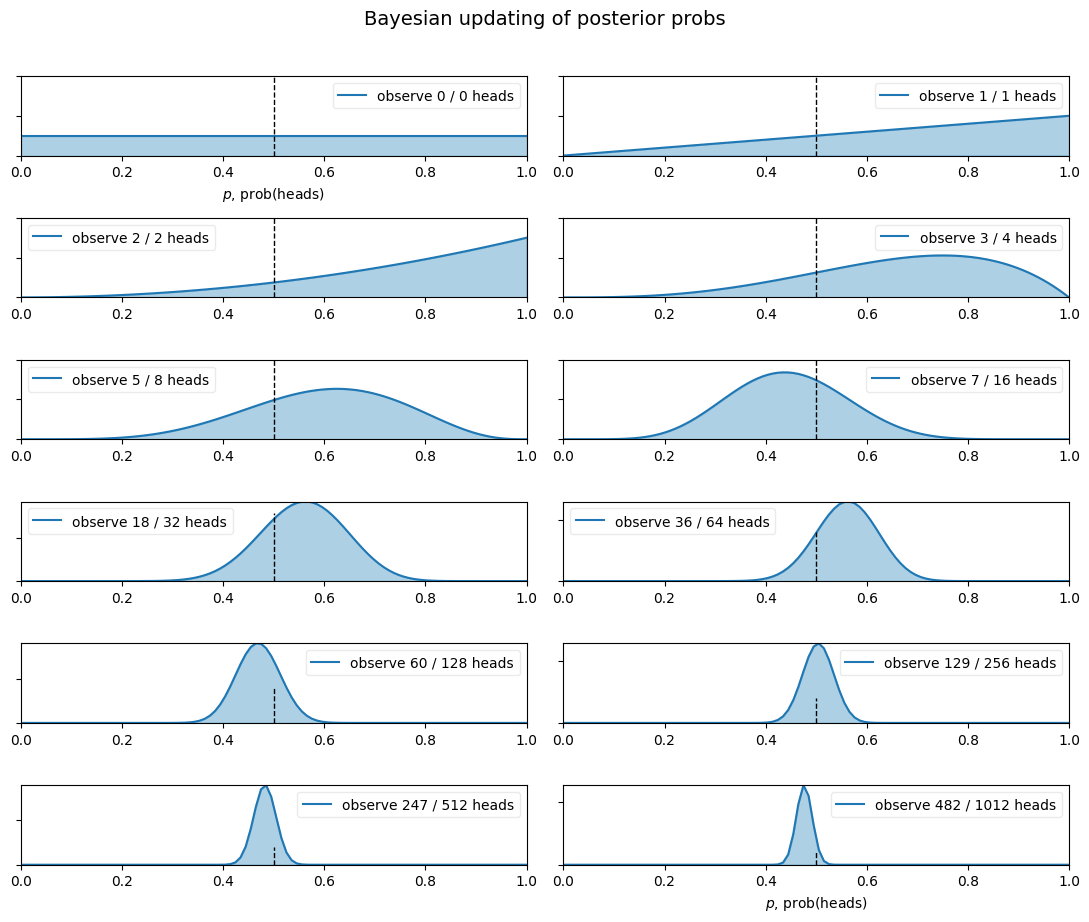

In [3]:
dist = stats.beta
n_trials = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1012]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# Bernoulli conj. prior
for i, n in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) // 2, 2, i + 1)
    plt.xlabel(
        '$p$, prob(heads)' if i in (0, len(n_trials) - 1) else None)
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:n].sum()
    y = dist.pdf(x, 1 + heads, 1 + n - heads)
    plt.plot(x, y, label=f'observe {heads} / {n} heads')
    plt.fill_between(x, 0, y, color='#348ABD', alpha=0.4)
    plt.vlines(0.5, 0, 4, color='k', linestyles='--', lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
plt.suptitle(
    'Bayesian updating of posterior probs', y=1.02, fontsize=14)
plt.tight_layout()

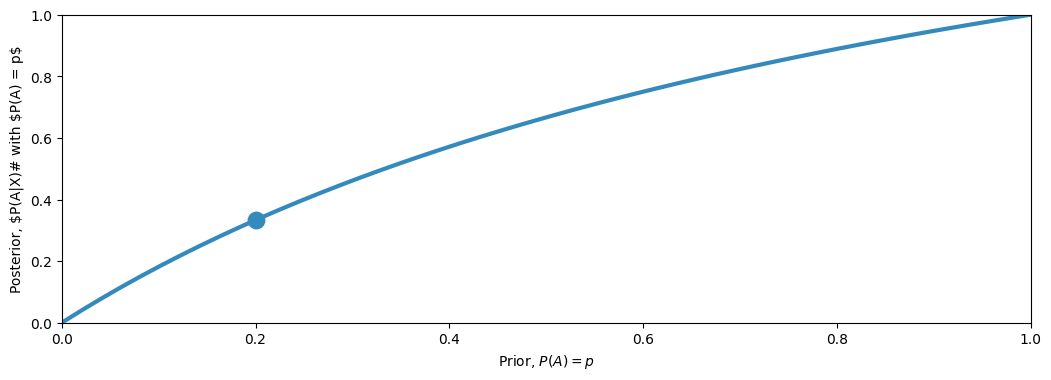

In [4]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p / (1 + p), color='#348ABD', lw=3)
plt.scatter(0.2, 2 * 0.2 / 1.2, s=140, c='#348ABD')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Prior, $P(A) = p$')
plt.ylabel('Posterior, $P(A|X)# with $P(A) = p$');

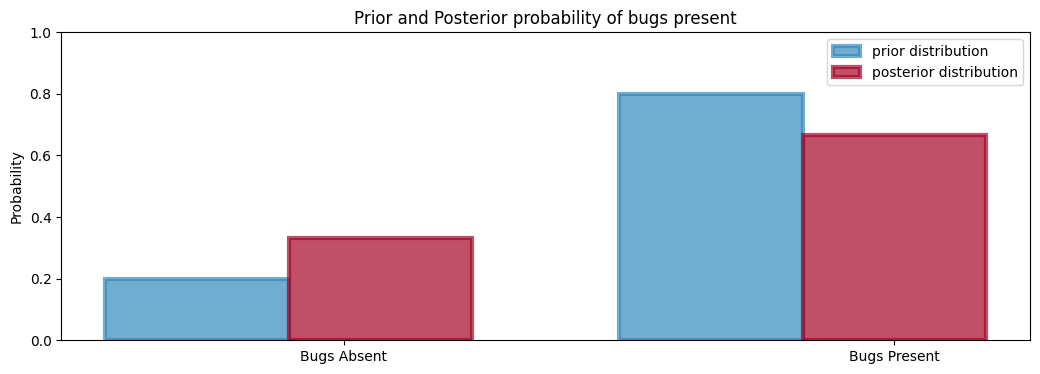

In [5]:
figsize(12.5, 4)
colors = ['#348ABD', '#A60628']
prior = [0.20, 0.80]
posterior = [1. / 3, 2. / 3]
plt.bar(
    [0, .7],
    prior,
    alpha=0.7,
    width=0.25,
    color=colors[0],
    label='prior distribution',
    lw=3,
    edgecolor=colors[0])
plt.bar(
    [0 + 0.25, .7 + 0.25],
    posterior, 
    alpha=0.7,
    width=0.25,
    color=colors[1],
    label='posterior distribution',
    lw=3, 
    edgecolor=colors[1])
plt.ylim(0, 1)
plt.xticks([0.20, .95], ['Bugs Absent', 'Bugs Present'])
plt.title('Prior and Posterior probability of bugs present')
plt.ylabel('Probability')
plt.legend();

### Probability Distributions

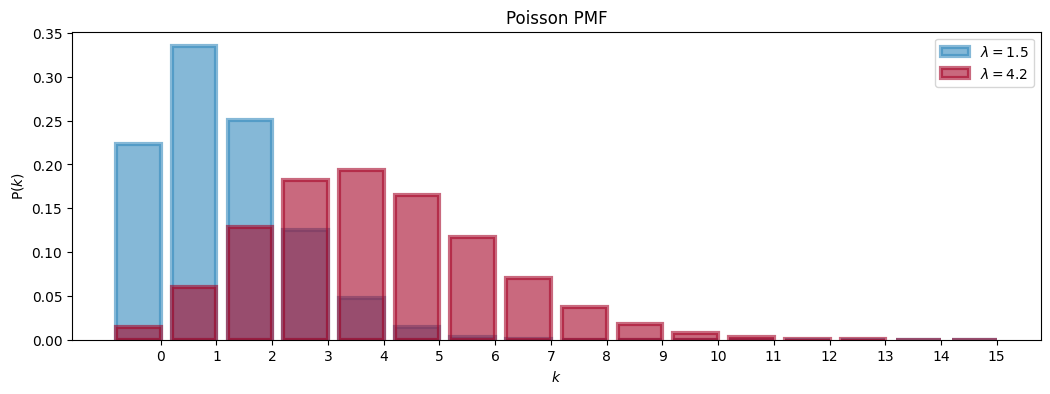

In [6]:
a = np.arange(16)
lamb = [1.5, 4.25]
for i in [0, 1]:
    plt.bar(
        a,
        stats.poisson.pmf(a, lamb[i]),
        color=colors[i],
    label=f'$\lambda = {lamb[i]:.1f}$',
    alpha=0.6,
    edgecolor=colors[i], 
    lw=3)
plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel('P($k$)')
plt.xlabel('$k$')
plt.title('Poisson PMF');

### Continous Case

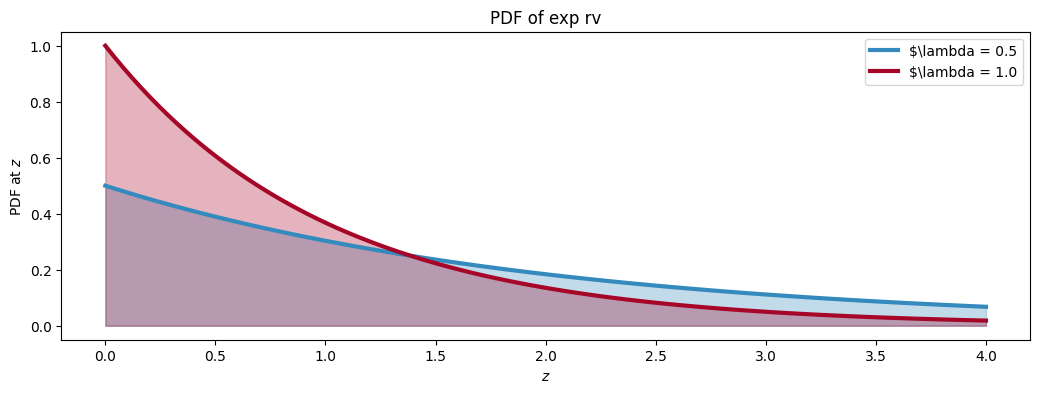

In [7]:
a = np.linspace(0, 4, 100)
lamb = [0.5, 1]

for l, c in zip(lamb, colors):
    y = stats.expon.pdf(a, scale=1./ l)
    plt.plot(
        a, 
        y, 
        lw=3, 
        color=c, 
        label=f'$\lambda = {l:.1f}')
    plt.fill_between(a, y, color=c, alpha=0.3)
plt.legend()
plt.ylabel('PDF at $z$')
plt.xlabel('$z$')
plt.title('PDF of exp rv');

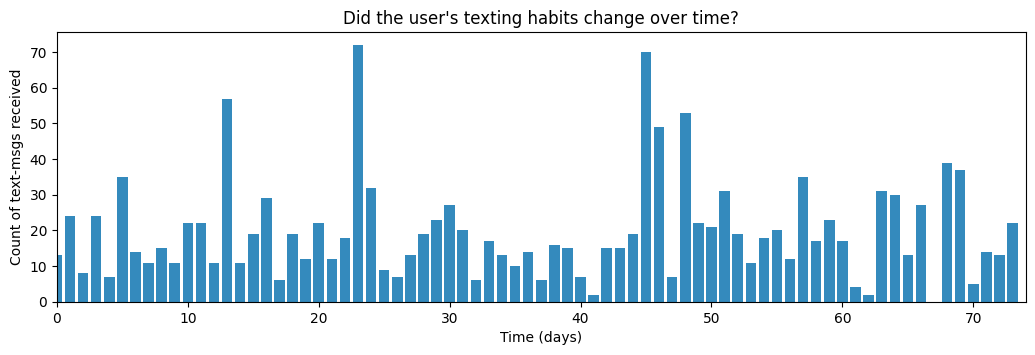

In [8]:
figsize(12.5, 3.5)
count_data = np.loadtxt('data/txtdata.csv')
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color='#348ABD')
plt.xlabel('Time (days)')
plt.ylabel('Count of text-msgs received')
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);